In [13]:
import tensorflow as tf
import keras
from keras import layers, Model, Input
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Lambda
from keras.optimizers import Adam
import numpy as np
import os

In [14]:
# Create a base network
def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (10, 10), activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (7, 7), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (4, 4), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(256, (4, 4), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    return Model(input, x)

input_shape = (105, 105, 1)
base_network = create_base_network(input_shape)

In [15]:
# Create and process a siamese network
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Compute the L1 distance between the processed inputs
distance = Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))([processed_a, processed_b])
output = Dense(1, activation='sigmoid')(distance)

In [16]:
# compile the model
model = Model([input_a, input_b], output)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
def load_arrays(prefix='dataset', input_folder='data/tf_inputs'):
    X_train_1 = np.load(os.path.join(input_folder, f'{prefix}_X_train_1.npy'))
    X_train_2 = np.load(os.path.join(input_folder, f'{prefix}_X_train_2.npy'))
    labels_train = np.load(os.path.join(input_folder, f'{prefix}_labels_train.npy'))
    X_val_1 = np.load(os.path.join(input_folder, f'{prefix}_X_val_1.npy'))
    X_val_2 = np.load(os.path.join(input_folder, f'{prefix}_X_val_2.npy'))
    labels_val = np.load(os.path.join(input_folder, f'{prefix}_labels_val.npy'))
    print(f'Data loaded from "{input_folder}" with prefix "{prefix}"')
    return X_train_1, X_train_2, labels_train, X_val_1, X_val_2, labels_val

## Train

In [18]:
# Load the data
X_train_1, X_train_2, labels_train, X_val_1, X_val_2, labels_val = load_arrays()

# Train the model
history = model.fit([X_train_1, X_train_2], labels_train, validation_data=([X_val_1, X_val_2], labels_val), epochs=50, batch_size=32)

# Save the trained model
model.save('handwriting_author_verification_model.h5')

Data loaded from "data/tf_inputs" with prefix "dataset"
Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.5790 - loss: 0.6430 - val_accuracy: 0.6317 - val_loss: 0.6375
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 641s 2s/step - accuracy: 0.6561 - loss: 0.6221 - val_accuracy: 0.6412 - val_loss: 0.6183
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.6680 - loss: 0.6082 - val_accuracy: 0.6511 - val_loss: 0.6248
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 671s 2s/step - accuracy: 0.6695 - loss: 0.6023 - val_accuracy: 0.6572 - val_loss: 0.6139
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 693s 2s/step - accuracy: 0.6854 - loss: 0.5905 - val_accuracy: 0.6697 - val_loss: 0.6034
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.6845 - loss: 0.5799 - val_accuracy: 0.6678 - val_loss: 0.5930
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 730s 2s/step - accuracy: 0.6955 - loss: 0.5752 - val_accuracy: 0.6617 - val_loss: 0.6002
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 7

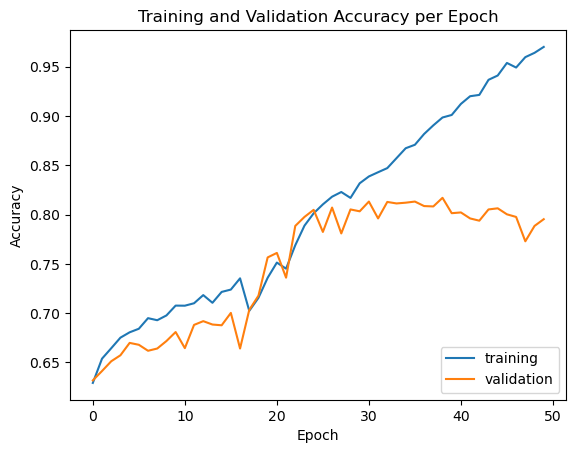

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Training and Validation Accuracy per Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(['training', 'validation'], loc = 'lower right')